# Dask starter notebook

This notebook introduces the basics of using dask with delayed functions and bags.

You don't need to write any code to execute this notebook, just step through each cell.

In [1]:
import dask
import dask.bag as db

# We'll use sleep to simulate some real work
from time import sleep

In [2]:
# We'll define a function that sleeps for 1 second to simulate work,
# then returns the square of its input.

def square(x):
    sleep(1)
    return x*x

In [3]:
# How long does it take to run a sum-of-squares serially?
%time sum([square(z) for z in range(10)])

CPU times: total: 0 ns
Wall time: 10 s


285

In [4]:
# Make a delayed version of square
f = dask.delayed(square)

# y is now a delayed computation
y = f(5)

In [5]:
y

Delayed('square-94cdccef-0315-4ffb-a6ea-bb81ee125869')

In [6]:
# We can derive a delayed computation for our sum above
z = dask.delayed(sum)([f(x) for x in range(10)])

In [7]:
# How long does it take to run the delayed summation with dask?
%time z.compute()

CPU times: total: 31.2 ms
Wall time: 2.49 s


285

In [8]:
# How long does it take to run the delayed summation with dask if we force the number of workers using thread mode
%time z.compute(scheduler='threads', num_workers=5)

CPU times: total: 0 ns
Wall time: 2.01 s


285

In [9]:
# How long does it take to run the delayed summation with dask if using process mode
%time z.compute(scheduler='processes', num_workers=5)

CPU times: total: 0 ns
Wall time: 7.07 s


285

In [10]:
# How long does it take to run the delayed summation with dask if we use synchronous mode
%time z.compute(scheduler='synchronous', num_workers=5)

CPU times: total: 0 ns
Wall time: 10 s


285

## Bags

The code above uses only delayed functions to express parallel computation.
We can also use bags to represent our data, and have a slightly higher-level control over things.

In [11]:
# Make a bag out of the sequence [0, 1, 2, 3, 4]
# Give it 3 partitions
bag = db.from_sequence(range(5), npartitions=3)

# Map the square function over the bag
c = bag.map(square)

# Apply the sum function to the result
d = c.sum()

In [12]:
bag

dask.bag<from_sequence, npartitions=3>

In [13]:
# Mapping a function over a bag produces a new bag with the same partition structure
c

dask.bag<square, npartitions=3>

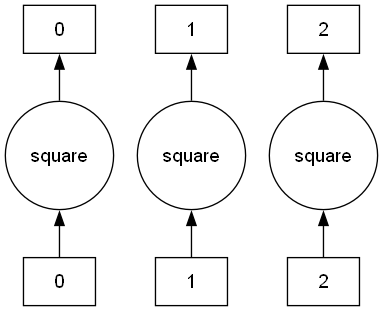

In [14]:
# We can visualize the computation as follows:
c.visualize()

In [15]:
# Applying a sum() reduction gives us a single Item (not a bag)
d

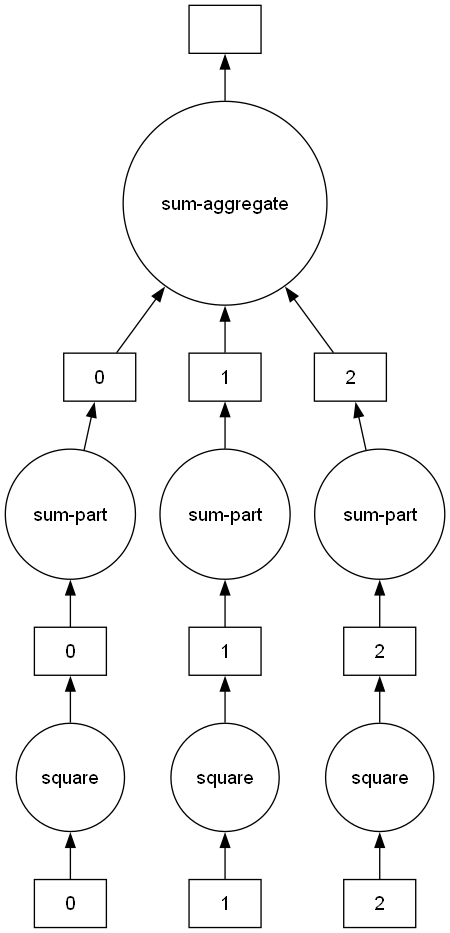

In [16]:
d.visualize()

In [17]:
d.compute()

30